Aymone Kouame

4/15/2020


In [252]:
#from numpy import loadtxt
import pandas as pd
import sklearn
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np

##  Load the data

In [253]:
train = pd.read_csv('train_housingdataset.csv')
test = pd.read_csv('test_housingdataset.csv')

## Data understanding and transformations

In [254]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [225]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## encoding categorical variable to numeric representation
and converting float numbers to integer

In [257]:
label_encoder = preprocessing.LabelEncoder() 

for c in train.drop(['MSZoning', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'HouseStyle', 'MasVnrType',
        'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'SaleCondition', 'KitchenQual', 'Functional',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',  'GarageType', 'GarageFinish',
        'PavedDrive', 'SaleCondition', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'MiscFeature', 
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
        'FireplaceQu',  'GarageYrBlt', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolArea', 'PoolQC','Fence','YrSold', 'SaleType'], axis =1 ).columns:

    train[c] = train[c].fillna(0).astype('int64')

In [261]:
label_encoder = preprocessing.LabelEncoder() 

for c in train[['MSZoning', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'HouseStyle', 'MasVnrType',
        'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'SaleCondition', 'KitchenQual', 'Functional',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',  'GarageType', 'GarageFinish',
        'PavedDrive', 'SaleCondition', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'MiscFeature', 
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
        'FireplaceQu',  'GarageYrBlt', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolArea', 'PoolQC','Fence','YrSold', 'SaleType']].columns:
    #
    #
    train[c] = str(train[c])#.fillna('unknown')
    train[c] = label_encoder.fit_transform(train[c])
    train[c] = pd.Categorical(train[c])  
#     if train[c].isnull().value_counts().any() == True:
#         print(train[c].isnull().drop_duplicates())

In [262]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   int64   
 4   LotArea        1460 non-null   category
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [267]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,208500
1,2,20,0,80,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,181500
2,3,60,0,68,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,223500
3,4,70,0,60,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,140000
4,5,60,0,84,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,250000


## Model training

In [263]:
y_train = train['SalePrice']
x_train = train.drop(['Id', 'SalePrice'], axis = 1)

In [264]:
from keras import Sequential 
NN_model = Sequential() 
# The Input Layer : 
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu')) 
# The Hidden Layers : 
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu')) 
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu')) 
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu')) 
# The Output Layer : 
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) 
# Compile the network : 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error']) 
NN_model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               10240     
_________________________________________________________________
dense_57 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_58 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_59 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 257       
Total params: 175,105
Trainable params: 175,105
Non-trainable params: 0
_________________________________________________________________


In [265]:
# fit the model
nn_fit = NN_model.fit(x_train, y_train, validation_split=0.4, epochs= 10, batch_size = 300)

Train on 876 samples, validate on 584 samples
Epoch 1/10
876/876 [==============================] - 0s 163us/step - loss: 183043.0963 - mean_absolute_error: 183043.0938 - val_loss: 177503.6596 - val_mean_absolute_error: 177503.6562
Epoch 2/10
876/876 [==============================] - 0s 34us/step - loss: 182863.9521 - mean_absolute_error: 182863.9375 - val_loss: 177206.4013 - val_mean_absolute_error: 177206.3906
Epoch 3/10
876/876 [==============================] - 0s 38us/step - loss: 182467.9103 - mean_absolute_error: 182467.9062 - val_loss: 176550.3658 - val_mean_absolute_error: 176550.3594
Epoch 4/10
876/876 [==============================] - 0s 50us/step - loss: 181610.3709 - mean_absolute_error: 181610.3750 - val_loss: 175176.7784 - val_mean_absolute_error: 175176.7656
Epoch 5/10
876/876 [==============================] - 0s 43us/step - loss: 179860.1644 - mean_absolute_error: 179860.1719 - val_loss: 172469.7857 - val_mean_absolute_error: 172469.7812
Epoch 6/10
876/876 [========

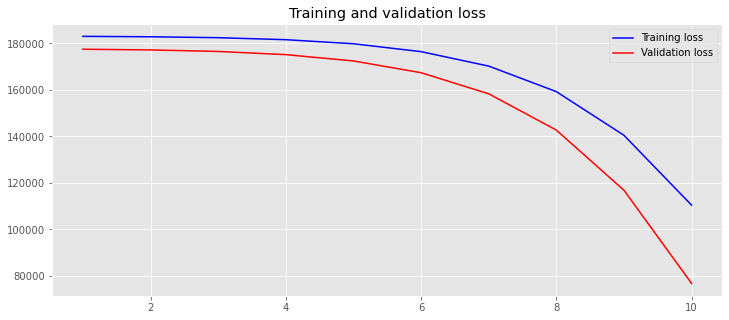

In [274]:
# Drawing learning curve

plt.style.use('ggplot') 

def plot_history(history): 
    loss = history.history['loss'] 
    val_loss = history.history['val_loss'] 
    x = range(1, len(loss) + 1) 
    plt.figure(figsize=(12, 5)) 
    plt.plot(x, loss, 'b', label='Training loss') 
    plt.plot(x, val_loss, 'r', label='Validation loss') 
    plt.title('Training and validation loss') 
    plt.legend() 
    plt.show() 

plot_history(nn_fit)


The shape of my learning curve looks different than the professor power point. It is because of all the data transformation that I perfored before training my model.

### Saving the model and the weights

In [ ]:
import keras
from keras.callbacks import ModelCheckpoint 

In [281]:
# Define a checkpoint to save the data 
checkpoint_name = 'Weights_assignment7.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto') 
callbacks_list = [checkpoint] 
# Train the model
NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list) 


Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 119us/step - loss: 36667.1064 - mean_absolute_error: 36667.1055 - val_loss: 38875.2109 - val_mean_absolute_error: 38875.2070

Epoch 00001: val_loss improved from inf to 38875.21094, saving model to Weights_assignment7.hdf5
Epoch 2/500
1168/1168 [==============================] - 0s 100us/step - loss: 35201.3334 - mean_absolute_error: 35201.3320 - val_loss: 38584.2422 - val_mean_absolute_error: 38584.2461

Epoch 00002: val_loss improved from 38875.21094 to 38584.24224, saving model to Weights_assignment7.hdf5
Epoch 3/500
1168/1168 [==============================] - 0s 112us/step - loss: 33631.0092 - mean_absolute_error: 33631.0078 - val_loss: 38155.8505 - val_mean_absolute_error: 38155.8516

Epoch 00003: val_loss improved from 38584.24224 to 38155.85049, saving model to Weights_assignment7.hdf5
Epoch 4/500
1168/1168 [==============================] - 0s 112us/step - loss: 33118.264

Epoch 32/500
1168/1168 [==============================] - 0s 118us/step - loss: 30181.8325 - mean_absolute_error: 30181.8359 - val_loss: 33434.5451 - val_mean_absolute_error: 33434.5469

Epoch 00032: val_loss improved from 33476.61954 to 33434.54506, saving model to Weights_assignment7.hdf5
Epoch 33/500
1168/1168 [==============================] - 0s 118us/step - loss: 29525.6978 - mean_absolute_error: 29525.6992 - val_loss: 33778.7618 - val_mean_absolute_error: 33778.7656

Epoch 00033: val_loss did not improve from 33434.54506
Epoch 34/500
1168/1168 [==============================] - 0s 114us/step - loss: 30917.0170 - mean_absolute_error: 30917.0176 - val_loss: 35882.7140 - val_mean_absolute_error: 35882.7148

Epoch 00034: val_loss did not improve from 33434.54506
Epoch 35/500
1168/1168 [==============================] - 0s 111us/step - loss: 29528.5894 - mean_absolute_error: 29528.5957 - val_loss: 32896.1695 - val_mean_absolute_error: 32896.1719

Epoch 00035: val_loss improved from 3

1168/1168 [==============================] - 0s 122us/step - loss: 24590.8491 - mean_absolute_error: 24590.8477 - val_loss: 30109.1036 - val_mean_absolute_error: 30109.1055

Epoch 00096: val_loss did not improve from 29942.34423
Epoch 97/500
1168/1168 [==============================] - 0s 128us/step - loss: 25369.0108 - mean_absolute_error: 25369.0098 - val_loss: 30607.4123 - val_mean_absolute_error: 30607.4141

Epoch 00097: val_loss did not improve from 29942.34423
Epoch 98/500
1168/1168 [==============================] - 0s 113us/step - loss: 24723.6993 - mean_absolute_error: 24723.6973 - val_loss: 31224.2296 - val_mean_absolute_error: 31224.2324

Epoch 00098: val_loss did not improve from 29942.34423
Epoch 99/500
1168/1168 [==============================] - 0s 118us/step - loss: 24280.7381 - mean_absolute_error: 24280.7422 - val_loss: 30362.9690 - val_mean_absolute_error: 30362.9727

Epoch 00099: val_loss did not improve from 29942.34423
Epoch 100/500
1168/1168 [====================


Epoch 00160: val_loss did not improve from 27337.60702
Epoch 161/500
1168/1168 [==============================] - 0s 105us/step - loss: 21687.7966 - mean_absolute_error: 21687.7988 - val_loss: 28390.1245 - val_mean_absolute_error: 28390.1250

Epoch 00161: val_loss did not improve from 27337.60702
Epoch 162/500
1168/1168 [==============================] - 0s 110us/step - loss: 20243.7402 - mean_absolute_error: 20243.7402 - val_loss: 29054.6629 - val_mean_absolute_error: 29054.6641

Epoch 00162: val_loss did not improve from 27337.60702
Epoch 163/500
1168/1168 [==============================] - 0s 105us/step - loss: 20762.4645 - mean_absolute_error: 20762.4688 - val_loss: 27654.4826 - val_mean_absolute_error: 27654.4824

Epoch 00163: val_loss did not improve from 27337.60702
Epoch 164/500
1168/1168 [==============================] - 0s 111us/step - loss: 19820.1078 - mean_absolute_error: 19820.1074 - val_loss: 28414.6058 - val_mean_absolute_error: 28414.6074

Epoch 00164: val_loss did n


Epoch 00193: val_loss did not improve from 26421.28264
Epoch 194/500
1168/1168 [==============================] - 0s 102us/step - loss: 18508.7809 - mean_absolute_error: 18508.7773 - val_loss: 27223.3336 - val_mean_absolute_error: 27223.3359

Epoch 00194: val_loss did not improve from 26421.28264
Epoch 195/500
1168/1168 [==============================] - 0s 100us/step - loss: 18419.7257 - mean_absolute_error: 18419.7266 - val_loss: 27188.4208 - val_mean_absolute_error: 27188.4219

Epoch 00195: val_loss did not improve from 26421.28264
Epoch 196/500
1168/1168 [==============================] - 0s 110us/step - loss: 18608.6548 - mean_absolute_error: 18608.6562 - val_loss: 27258.4309 - val_mean_absolute_error: 27258.4277

Epoch 00196: val_loss did not improve from 26421.28264
Epoch 197/500
1168/1168 [==============================] - 0s 111us/step - loss: 18630.4412 - mean_absolute_error: 18630.4395 - val_loss: 28675.4302 - val_mean_absolute_error: 28675.4297

Epoch 00197: val_loss did n

Epoch 227/500
1168/1168 [==============================] - 0s 94us/step - loss: 17333.3106 - mean_absolute_error: 17333.3125 - val_loss: 26312.2701 - val_mean_absolute_error: 26312.2715

Epoch 00227: val_loss did not improve from 26057.43472
Epoch 228/500
1168/1168 [==============================] - 0s 105us/step - loss: 17267.3753 - mean_absolute_error: 17267.3730 - val_loss: 26354.3640 - val_mean_absolute_error: 26354.3633

Epoch 00228: val_loss did not improve from 26057.43472
Epoch 229/500
1168/1168 [==============================] - 0s 167us/step - loss: 17074.3133 - mean_absolute_error: 17074.3145 - val_loss: 26621.7849 - val_mean_absolute_error: 26621.7852

Epoch 00229: val_loss did not improve from 26057.43472
Epoch 230/500
1168/1168 [==============================] - 0s 143us/step - loss: 16988.4293 - mean_absolute_error: 16988.4277 - val_loss: 26313.3158 - val_mean_absolute_error: 26313.3164

Epoch 00230: val_loss did not improve from 26057.43472
Epoch 231/500
1168/1168 [====


Epoch 00260: val_loss did not improve from 25695.79902
Epoch 261/500
1168/1168 [==============================] - 0s 130us/step - loss: 16278.6909 - mean_absolute_error: 16278.6914 - val_loss: 28296.6991 - val_mean_absolute_error: 28296.6992

Epoch 00261: val_loss did not improve from 25695.79902
Epoch 262/500
1168/1168 [==============================] - 0s 122us/step - loss: 16647.8914 - mean_absolute_error: 16647.8926 - val_loss: 31707.7632 - val_mean_absolute_error: 31707.7676

Epoch 00262: val_loss did not improve from 25695.79902
Epoch 263/500
1168/1168 [==============================] - 0s 123us/step - loss: 20211.5480 - mean_absolute_error: 20211.5527 - val_loss: 28688.5192 - val_mean_absolute_error: 28688.5195

Epoch 00263: val_loss did not improve from 25695.79902
Epoch 264/500
1168/1168 [==============================] - 0s 121us/step - loss: 16174.3541 - mean_absolute_error: 16174.3545 - val_loss: 26396.9660 - val_mean_absolute_error: 26396.9668

Epoch 00264: val_loss did n

1168/1168 [==============================] - 0s 127us/step - loss: 16257.9444 - mean_absolute_error: 16257.9453 - val_loss: 25968.9461 - val_mean_absolute_error: 25968.9453

Epoch 00327: val_loss did not improve from 25028.85718
Epoch 328/500
1168/1168 [==============================] - 0s 118us/step - loss: 14983.0176 - mean_absolute_error: 14983.0156 - val_loss: 26137.9315 - val_mean_absolute_error: 26137.9316

Epoch 00328: val_loss did not improve from 25028.85718
Epoch 329/500
1168/1168 [==============================] - 0s 120us/step - loss: 16004.7406 - mean_absolute_error: 16004.7412 - val_loss: 27628.1503 - val_mean_absolute_error: 27628.1504

Epoch 00329: val_loss did not improve from 25028.85718
Epoch 330/500
1168/1168 [==============================] - 0s 114us/step - loss: 16979.2452 - mean_absolute_error: 16979.2441 - val_loss: 32446.7845 - val_mean_absolute_error: 32446.7812

Epoch 00330: val_loss did not improve from 25028.85718
Epoch 331/500
1168/1168 [=================

1168/1168 [==============================] - 0s 122us/step - loss: 15116.0057 - mean_absolute_error: 15116.0068 - val_loss: 28516.0459 - val_mean_absolute_error: 28516.0488

Epoch 00361: val_loss did not improve from 25028.85718
Epoch 362/500
1168/1168 [==============================] - 0s 115us/step - loss: 15992.4157 - mean_absolute_error: 15992.4160 - val_loss: 25524.0606 - val_mean_absolute_error: 25524.0605

Epoch 00362: val_loss did not improve from 25028.85718
Epoch 363/500
1168/1168 [==============================] - 0s 118us/step - loss: 16005.2100 - mean_absolute_error: 16005.2109 - val_loss: 25600.2257 - val_mean_absolute_error: 25600.2266

Epoch 00363: val_loss did not improve from 25028.85718
Epoch 364/500
1168/1168 [==============================] - 0s 114us/step - loss: 14677.9237 - mean_absolute_error: 14677.9229 - val_loss: 26162.9816 - val_mean_absolute_error: 26162.9824

Epoch 00364: val_loss did not improve from 25028.85718
Epoch 365/500
1168/1168 [=================


Epoch 00394: val_loss did not improve from 24894.78232
Epoch 395/500
1168/1168 [==============================] - 0s 120us/step - loss: 15848.8191 - mean_absolute_error: 15848.8184 - val_loss: 26646.6713 - val_mean_absolute_error: 26646.6699

Epoch 00395: val_loss did not improve from 24894.78232
Epoch 396/500
1168/1168 [==============================] - 0s 120us/step - loss: 14827.6564 - mean_absolute_error: 14827.6562 - val_loss: 25745.3533 - val_mean_absolute_error: 25745.3535

Epoch 00396: val_loss did not improve from 24894.78232
Epoch 397/500
1168/1168 [==============================] - 0s 115us/step - loss: 15198.1204 - mean_absolute_error: 15198.1211 - val_loss: 26788.2964 - val_mean_absolute_error: 26788.2949

Epoch 00397: val_loss did not improve from 24894.78232
Epoch 398/500
1168/1168 [==============================] - 0s 110us/step - loss: 14622.8671 - mean_absolute_error: 14622.8662 - val_loss: 26723.1527 - val_mean_absolute_error: 26723.1523

Epoch 00398: val_loss did n

1168/1168 [==============================] - 0s 113us/step - loss: 15236.6824 - mean_absolute_error: 15236.6816 - val_loss: 26584.7494 - val_mean_absolute_error: 26584.7480

Epoch 00462: val_loss did not improve from 24894.78232
Epoch 463/500
1168/1168 [==============================] - 0s 110us/step - loss: 14137.8289 - mean_absolute_error: 14137.8291 - val_loss: 25629.8801 - val_mean_absolute_error: 25629.8809

Epoch 00463: val_loss did not improve from 24894.78232
Epoch 464/500
1168/1168 [==============================] - 0s 108us/step - loss: 13921.8127 - mean_absolute_error: 13921.8125 - val_loss: 27002.3124 - val_mean_absolute_error: 27002.3125

Epoch 00464: val_loss did not improve from 24894.78232
Epoch 465/500
1168/1168 [==============================] - 0s 112us/step - loss: 13930.7825 - mean_absolute_error: 13930.7822 - val_loss: 26550.6697 - val_mean_absolute_error: 26550.6699

Epoch 00465: val_loss did not improve from 24894.78232
Epoch 466/500
1168/1168 [=================

1168/1168 [==============================] - 0s 120us/step - loss: 13957.0349 - mean_absolute_error: 13957.0332 - val_loss: 28563.1405 - val_mean_absolute_error: 28563.1387

Epoch 00496: val_loss did not improve from 24894.78232
Epoch 497/500
1168/1168 [==============================] - 0s 116us/step - loss: 14290.7892 - mean_absolute_error: 14290.7881 - val_loss: 25910.3286 - val_mean_absolute_error: 25910.3301

Epoch 00497: val_loss did not improve from 24894.78232
Epoch 498/500
1168/1168 [==============================] - 0s 112us/step - loss: 14455.9020 - mean_absolute_error: 14455.9004 - val_loss: 26258.4171 - val_mean_absolute_error: 26258.4160

Epoch 00498: val_loss did not improve from 24894.78232
Epoch 499/500
1168/1168 [==============================] - 0s 108us/step - loss: 12928.8994 - mean_absolute_error: 12928.8994 - val_loss: 26413.4425 - val_mean_absolute_error: 26413.4414

Epoch 00499: val_loss did not improve from 24894.78232
Epoch 500/500
1168/1168 [=================

### reloading and using the best weights while changing `patience` numbers

In [287]:
def train_control(p):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience= p) 
    callbacks_list= keras.callbacks.ModelCheckpoint('Weights_assignment7.hdf5', monitor='val_loss', save_best_only = True) 
    callbacks = [early_stop, callbacks_list] 
    hist = NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)
    
    return hist

In [290]:
## with patience = 30
stop1 = train_control(30)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 127us/step - loss: 11396.5368 - mean_absolute_error: 11396.5361 - val_loss: 26225.9419 - val_mean_absolute_error: 26225.9434
Epoch 2/500
1168/1168 [==============================] - 0s 118us/step - loss: 10859.0212 - mean_absolute_error: 10859.0225 - val_loss: 27064.0567 - val_mean_absolute_error: 27064.0527
Epoch 3/500
1168/1168 [==============================] - 0s 116us/step - loss: 11171.7366 - mean_absolute_error: 11171.7363 - val_loss: 26451.8571 - val_mean_absolute_error: 26451.8555
Epoch 4/500
1168/1168 [==============================] - 0s 110us/step - loss: 12725.1893 - mean_absolute_error: 12725.1895 - val_loss: 26401.4457 - val_mean_absolute_error: 26401.4473
Epoch 5/500
1168/1168 [==============================] - 0s 106us/step - loss: 11419.0211 - mean_absolute_error: 11419.0215 - val_loss: 26035.6752 - val_mean_absolute_error: 26035.6738
Epoch 6/500
1168/1168 [=====

Epoch 45/500
1168/1168 [==============================] - 0s 99us/step - loss: 13260.3363 - mean_absolute_error: 13260.3369 - val_loss: 25519.1615 - val_mean_absolute_error: 25519.1602
Epoch 46/500
1168/1168 [==============================] - 0s 98us/step - loss: 11603.4133 - mean_absolute_error: 11603.4141 - val_loss: 25998.3611 - val_mean_absolute_error: 25998.3594
Epoch 47/500
1168/1168 [==============================] - 0s 98us/step - loss: 11017.5703 - mean_absolute_error: 11017.5713 - val_loss: 26881.3456 - val_mean_absolute_error: 26881.3477
Epoch 48/500
1168/1168 [==============================] - 0s 103us/step - loss: 12215.7532 - mean_absolute_error: 12215.7529 - val_loss: 26232.3570 - val_mean_absolute_error: 26232.3574
Epoch 49/500
1168/1168 [==============================] - 0s 85us/step - loss: 11311.0113 - mean_absolute_error: 11311.0107 - val_loss: 25239.8497 - val_mean_absolute_error: 25239.8496
Epoch 50/500
1168/1168 [==============================] - 0s 91us/step - l

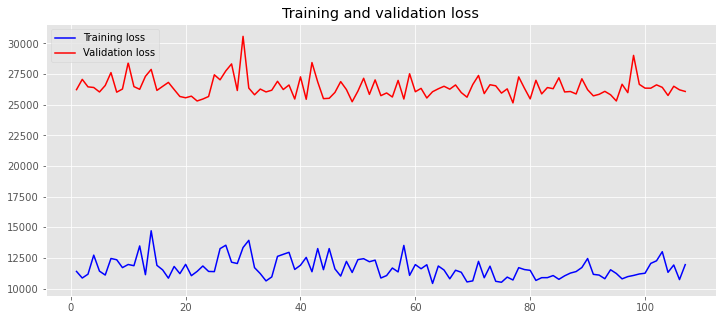

In [291]:
plot_history(stop1)

##### Changing the number of `patience`  to 20

In [292]:
stop2 = train_control(20)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 116us/step - loss: 12658.9829 - mean_absolute_error: 12658.9824 - val_loss: 26099.4729 - val_mean_absolute_error: 26099.4727
Epoch 2/500
1168/1168 [==============================] - 0s 95us/step - loss: 11683.0023 - mean_absolute_error: 11683.0000 - val_loss: 26357.2566 - val_mean_absolute_error: 26357.2578
Epoch 3/500
1168/1168 [==============================] - 0s 104us/step - loss: 10730.0686 - mean_absolute_error: 10730.0684 - val_loss: 25564.5802 - val_mean_absolute_error: 25564.5781
Epoch 4/500
1168/1168 [==============================] - 0s 103us/step - loss: 10231.0511 - mean_absolute_error: 10231.0488 - val_loss: 26945.0695 - val_mean_absolute_error: 26945.0684
Epoch 5/500
1168/1168 [==============================] - 0s 112us/step - loss: 11412.4491 - mean_absolute_error: 11412.4492 - val_loss: 26543.9318 - val_mean_absolute_error: 26543.9297
Epoch 6/500
1168/1168 [======

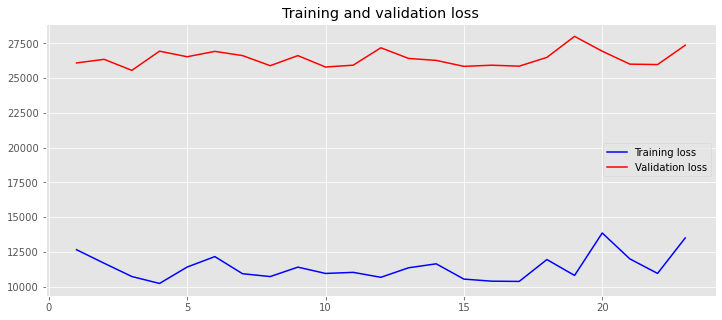

In [293]:
plot_history(stop2)

## `patience`

There is a point after which there is no improvement in the training session of the data, even if we keep increasing the epochs.
`patience` is the number of epochs that the data trainer is willing to wait after the training session reaches this point.

## See the performance of a regression model

We can use the `Mean Abosute Error (MAE)` in the case of a regression model involving a continuous target variable.

The prediction error is the difference between the actual value and the predicted value for that instance.
the `Mean Absolute Error` is the mean of all the absolute values of each prediction error of the entire testing dataset.
Therefore, the lower the MAE, the better (the more accurate the model is).